<img src="img/parties.png" alt="Democratic and Republican Party Logos">

<h1>Women in Congress</h1>

<p>When you begin to look at the demographics of Congress, one of the first things that stands out is that minorities have significantly less representation in comparison to causasion males. Despite this discrepency, a question that I wanted to answer is this: <b>Regarding women in Congress, what is the overall trend? Further, how does that trend break down when we compare political parties over time?</b> This notebook takes a look at the data and attempts to answer these questions.</p>

<h2>Sources:</h2>
<ul>
    <li><a href="https://www.brookings.edu/multi-chapter-report/vital-statistics-on-congress/" target="_blank">Brookings: Vital Statistics on Congress</a></li>
    <li><a href="http://cawp.rutgers.edu/women-us-house-representatives-2019" target="_blank">Rutgers: Women in the U.S. House of Representatives 2019</a></li>
    <li><a href="http://www.cawp.rutgers.edu/women-us-congress-2019" target="_blank">Rutgers: Women in the U.S. Congress 2019</a></li>
</ul>

<h3>Range of study: 1979-2019</h3>

TODO: Still not happy with the donut chart labels.

<h2>Imports</h2>

<ul>
    <li><a href="https://pandas.pydata.org/" target="_blank">Pandas:</a> Used to convert and perform algorithms on the data presented from a CSV format.</li>
    <li><a href="https://matplotlib.org/" target="_blank">Matplotlib:</a> Used for creating and exporting visualizations.</li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig

<h2>Data Import</h2>

<p>The range for this particular study begins with the 1979 Congressional class and extends to the current Congressional class. At the time of this study, the current year was 2019. The year 1979 was selected due to the origins of a meaningful trend. Up until that point, the women elected to congress were rare and did not show any meaningful trend due to the sparcity of women in Congress. The full dataset can be explored <a href="data/women_congress.csv">here</a>, however, any records prior to 1979 are not currently considered.</p>

<p><b>Note:</b> In the data set, if the number of women in Congress for a particular party was zero, it was represented with a period ('.'). These records were replaced with the integer 0.</p>

In [2]:
df = pd.read_csv('data/women_congress.csv').replace('.', 0).sort_values(by='Congress')
df['Member'] = pd.to_numeric(df['Member'])
df = df.loc[df['Year']>=1979]
df.head(10)

,Congress,Year,Chamber,Party,Member
126,96,1979,Senate,D,1
127,96,1979,Senate,R,1
124,96,1979,House,D,11
125,96,1979,House,R,5
131,97,1981,Senate,R,2
130,97,1981,Senate,D,0
128,97,1981,House,D,10
129,97,1981,House,R,9
132,98,1983,House,D,13
133,98,1983,House,R,9


In [12]:
#Senate
women_senate = df.query("Chamber=='Senate'")
women_senate_d = df.query("Chamber=='Senate' & Party=='D'")
women_senate_r = df.query("Chamber=='Senate' & Party=='R'")
tot_women_senate = women_senate['Member'].sum()

#House
women_house = df.query("Chamber=='House'")
women_house_d = df.query("Chamber=='House' & Party=='D'")
women_house_r = df.query("Chamber=='House' & Party=='R'")
tot_women_house = women_house['Member'].sum()

#TODO: Remove if unneeded.
# women_house_per_d = '{0: .0%}'.format(women_house_d['Member'].sum()/tot_women_house)
# women_house_per_r = '{0: .0%}'.format(women_house_r['Member'].sum()/tot_women_house)
# women_senate_per_d = '{0: .0%}'.format(women_senate_d['Member'].sum()/tot_women_senate)
# women_senate_per_r = '{0: .0%}'.format(women_senate_r['Member'].sum()/tot_women_senate)

Total women members of the House, Democrats: 783
Total women members of the House, Republicans: 324
Total women members of the House: 1107


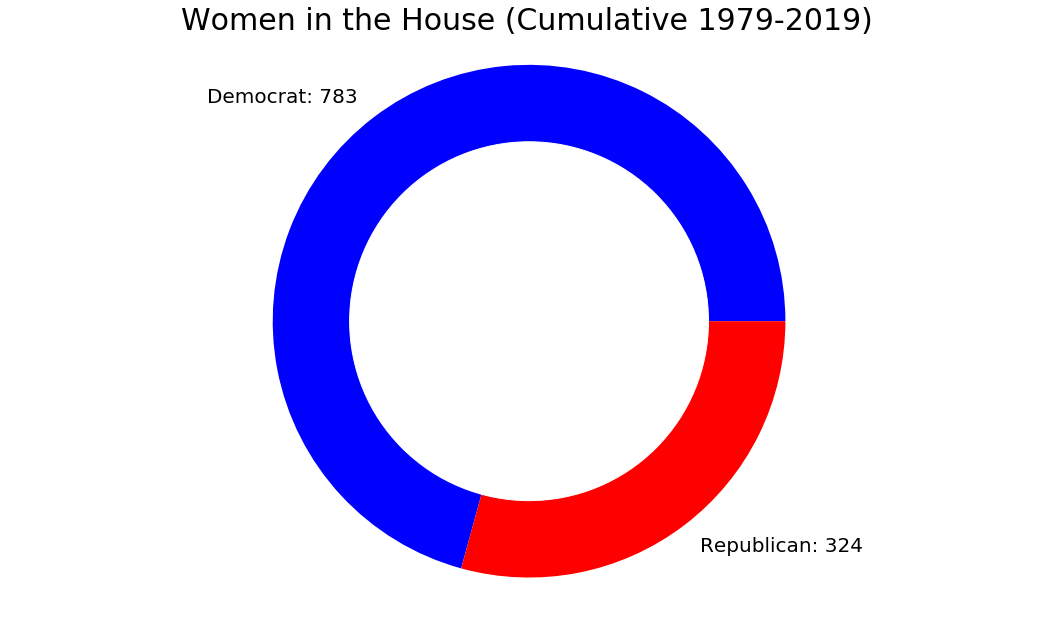

In [17]:
print('Total women members of the House, Democrats:', women_house_d['Member'].sum())
print('Total women members of the House, Republicans:', women_house_r['Member'].sum())
print('Total women members of the House:', tot_women_house)

pie_data = [women_house_d['Member'].sum(), women_house_r['Member'].sum()]
plt.pie(pie_data, labels=['Democrat: ' + str(women_house_d['Member'].sum()), 'Republican: ' + str(women_house_r['Member'].sum())], colors=["Blue", "Red"], textprops={'fontsize': 20})
plt.title('Women in the House (Cumulative 1979-2019)', fontsize=30)
plt.axis('equal')
inner_circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(inner_circle)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.draw()
fig.savefig('plots/house-donut.png', dpi=100)

Total women members of the Senate, Democrats: 153
Total women members of the Senate, Republicans: 70
Total women members of the Senate: 223


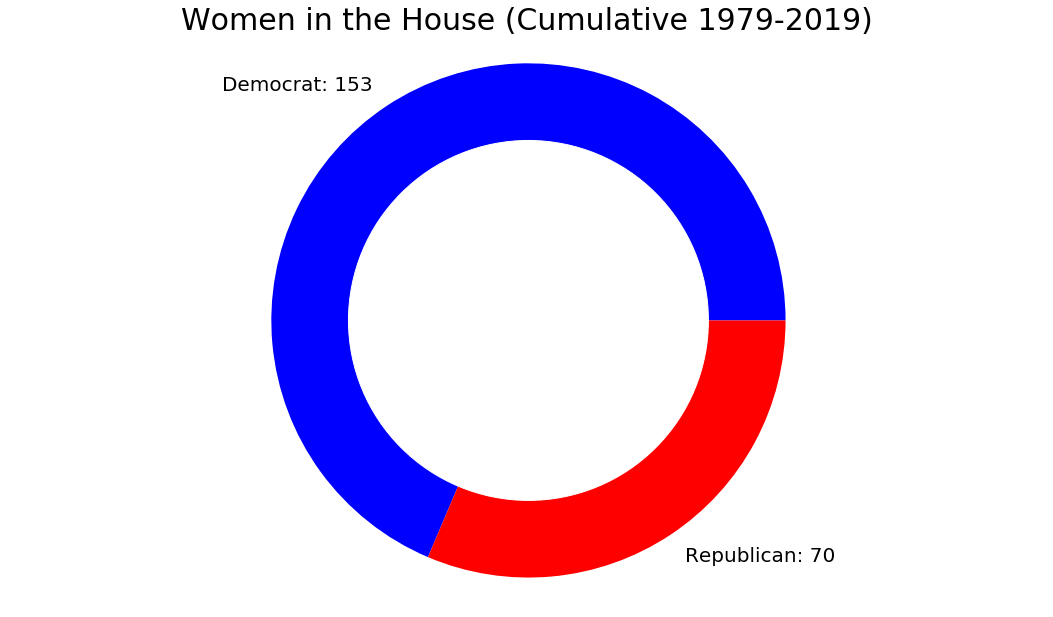

In [19]:
print('Total women members of the Senate, Democrats:', women_senate_d['Member'].sum())
print('Total women members of the Senate, Republicans:', women_senate_r['Member'].sum())
print('Total women members of the Senate:', tot_women_senate)

pie_data = [women_senate_d['Member'].sum(), women_senate_r['Member'].sum()]
plt.pie(pie_data, labels=['Democrat: ' + str(women_senate_d['Member'].sum()), 'Republican: ' + str(women_senate_r['Member'].sum())], colors=["Blue", "Red"], textprops={'fontsize': 20})
plt.title('Women in the House (Cumulative 1979-2019)', fontsize=30)
plt.axis('equal')
inner_circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(inner_circle)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.draw()
fig.savefig('plots/senate-donut.png', dpi=100)

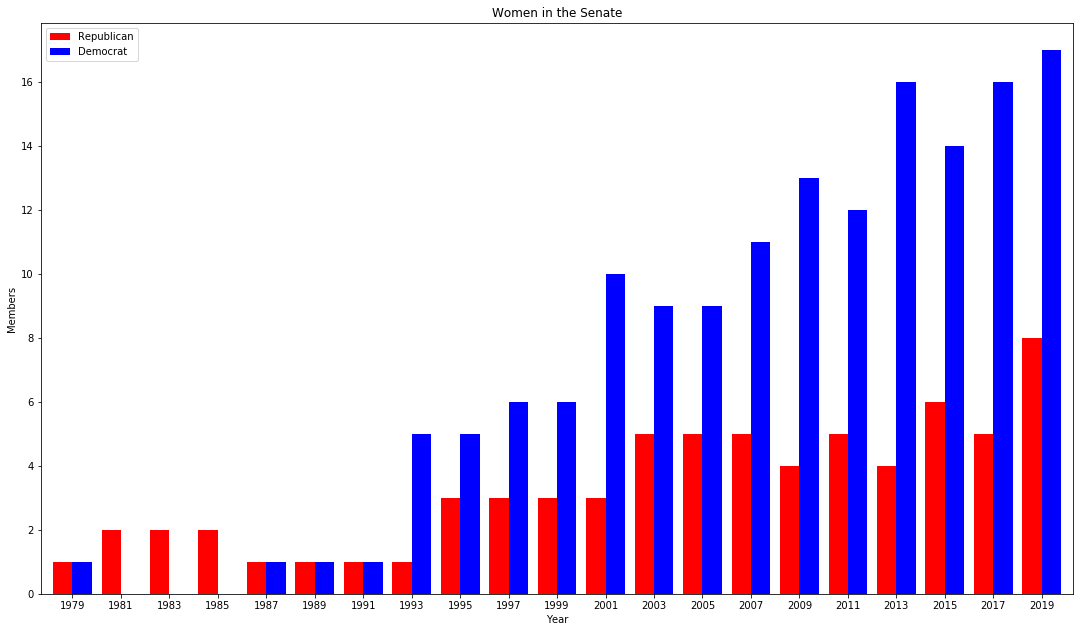

In [6]:
#Senate
times = women_senate_r['Year']
senate_r = pd.Series(women_senate_r['Member'].tolist(), index=times)
senate_d = pd.Series(women_senate_d['Member'].tolist(), index=times)

plot_df = pd.DataFrame({'Republican':senate_r, 'Democrat':senate_d})
_ = plot_df.plot.bar(color=["Red", "Blue"], width=0.8, rot=0, title="Women in the Senate")
_.set_xlabel("Year")
_.set_ylabel("Members")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.draw()
fig.savefig('plots/senate-bar.png', dpi=100)

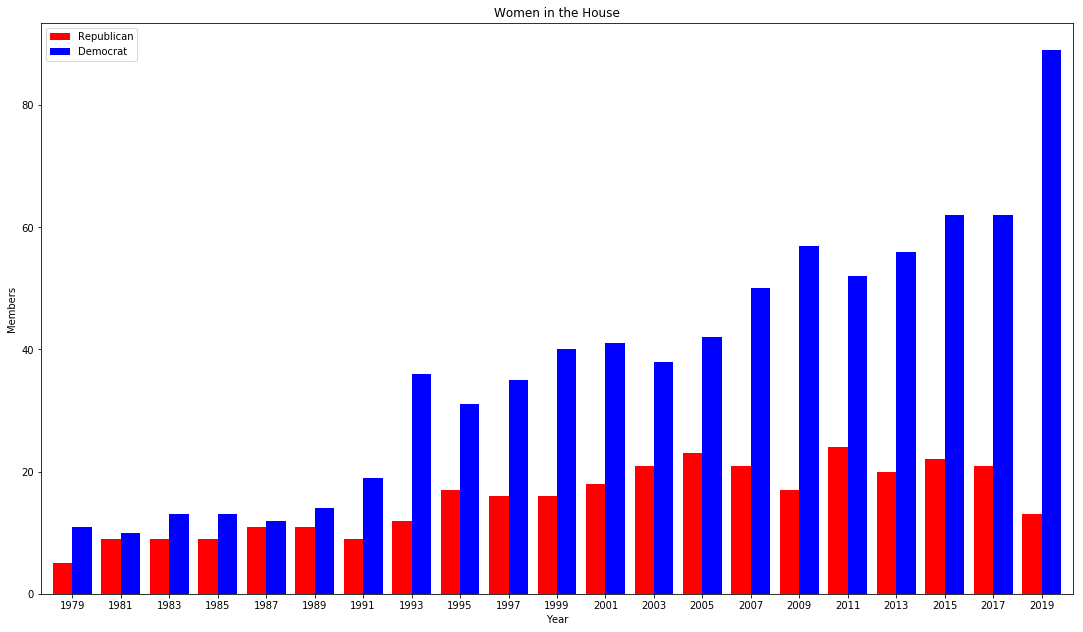

In [7]:
#House
times = women_senate_r['Year']
house_r = pd.Series(women_house_r['Member'].tolist(), index=times)
house_d = pd.Series(women_house_d['Member'].tolist(), index=times)

plot_df = pd.DataFrame({'Republican':house_r, 'Democrat':house_d})
_ = plot_df.plot.bar(color=["Red", "Blue"], width=0.8, rot=0, title="Women in the House")
_.set_xlabel("Year")
_.set_ylabel("Members")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.draw()
fig.savefig('plots/house-bar.png', dpi=100)